In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

Datos

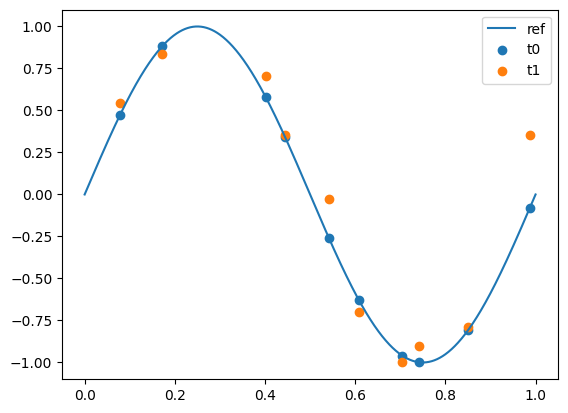

(10,) (10,) (10,)
[0.84996817 0.74133027 0.60834294 0.17191697 0.40135758 0.44417637
 0.54167562 0.07864807 0.70410285 0.9874023 ]
[[0.84996817]
 [0.74133027]
 [0.60834294]
 [0.17191697]
 [0.40135758]
 [0.44417637]
 [0.54167562]
 [0.07864807]
 [0.70410285]
 [0.9874023 ]] (10, 1)


In [ ]:

x_ref = np.linspace(0,1,1000) #Input
t_ref = np.sin(2*np.pi*x_ref)  #Output

x = np.random.uniform(0,1,10)
t0 = np.sin(2*np.pi*x)
t1 = t0 + 0.2*np.random.normal(0,1,t0.shape)

plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t0,label='t0')
plt.scatter(x,t1,label='t1')
plt.legend()
plt.show()

print(x.shape,t0.shape,t1.shape)

print(x)
print(x.reshape(-1,1),x.reshape(-1,1).shape)

Costo

Modelo

In [ ]:
def loss(t1,y):
  e = t1 - y
  return (e@e)/2

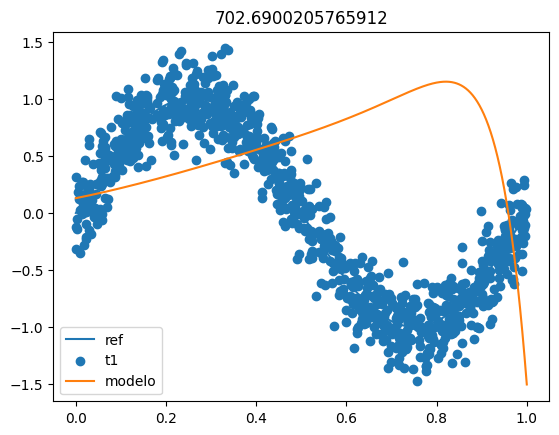

In [ ]:
M = 20 #Orden
w = np.random.normal(0,1,(M+1,)) #Parámetros
#print(w,w.shape)

def model(x):
  poly = PolynomialFeatures(M)
  b = poly.fit_transform(x.reshape(-1,1))
  return b@w

y = model(x)


plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t1,label='t1')
plt.plot(x_ref,model(x_ref),label='modelo')
plt.legend()
plt.title(loss(t1,model(x)))
plt.show()

Aprendizaje

In [ ]:
def learning(x,t1):
  poly = PolynomialFeatures(M)
  b = poly.fit_transform(x.reshape(-1,1))
  w = np.linalg.pinv(b)@t1
  return w

w = learning(x,t1)

M, t1.shape, w.shape

(20, (10,), (21,))

Todo junto

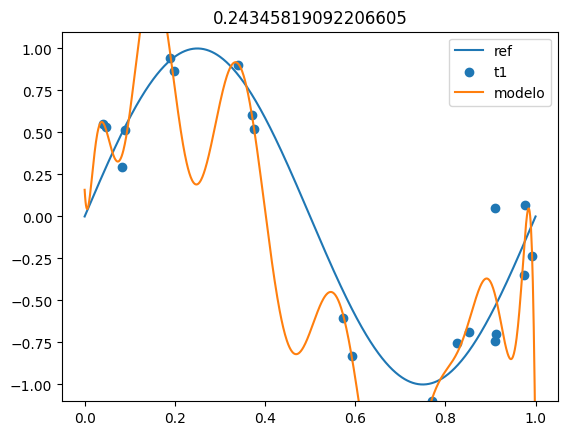

0.24345819092206605


In [ ]:
N = 20 #Número de datos
M = 15 #Orden


x = np.random.uniform(0,1,N)
t0 = np.sin(2*np.pi*x)
t1 = t0 + 0.2*np.random.normal(0,1,t0.shape)

w = learning(x,t1)
y = model(x)
l = loss(t1,y)

plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t1,label='t1')
plt.plot(x_ref,model(x_ref),label='modelo')
plt.ylim([-1.1, 1.1])
plt.legend()
plt.title(l)
plt.show()

print(l)

# solucion con regularizacion


$$ y= w_0+w_1x+w_2x^2+\dots w_Dx^D$$

$$ \mathbf{y}= \mathbf{x}\mathbf{w} $$


EVITAR SOBRE AJUSTE

In [4]:

from sklearn.linear_model import Ridge

# Generamos los datos
N =  20
x = np.random.uniform(0,  1, N)
t0 = np.sin(2 * np.pi * x)
t1 = t0 +  0.2 * np.random.normal(0,  1, t0.shape)

# Aprendemos el modelo con regularización L2
M =  15  # Orden del polinomio
alpha =  0.1  # Parámetro de regularización
modelo = Ridge(alpha=alpha)
modelo.fit(np.vander(x, M), t1)

# Usamos el modelo para predecir
y = modelo.predict(np.vander(x, M))

# Calculamos la pérdida
p = np.mean((t1 - y)**2)

print(f'Pérdida: {p:.4f}')




Pérdida: 0.0959
